In [1]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from shapely import wkt
from matplotlib.colors import ListedColormap

In [2]:
map = gpd.read_file('batas-provinsi-dukcapil-2019/BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp')

In [5]:
map.head(10)

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."
5,6,DKI JAKARTA,3.123689,0.053426,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ..."
6,7,GORONTALO,11.013237,0.977600,"MULTIPOLYGON Z (((121.42536 0.41243 0.00003, 1..."
7,8,JAMBI,11.835072,3.977711,"MULTIPOLYGON Z (((104.40714 -0.86371 0.00003, ..."
8,9,JAWA BARAT,11.614950,3.032785,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ..."
9,10,JAWA TENGAH,15.456349,2.819838,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ..."


<AxesSubplot: >

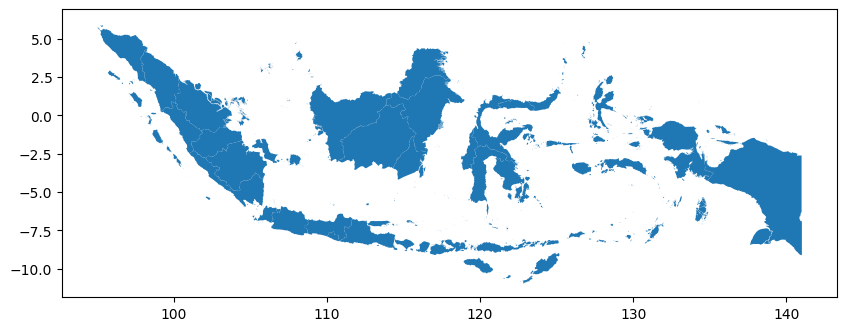

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
map.plot(ax=ax)

In [6]:
data_iklim = pd.read_csv('data_iklim.csv', sep=';')

In [16]:
data_iklim.head(30)

,PROVINSI,WS10M,PRECTOTCORR
0,ACEH,3.56,6.86
1,BALI,7.13,5.27
2,BANTEN,10.66,5.80
3,BENGKULU,4.59,7.12
4,DAERAH ISTIMEWA YOGYAKARTA,11.92,5.54
5,DKI JAKARTA,10.33,5.54
6,GORONTALO,10.00,5.27
7,JAMBI,4.67,5.54
8,JAWA BARAT,11.52,6.33
9,JAWA TENGAH,11.84,5.54


In [9]:
def calculate_limits(column_data):
    n = 1
    mean = column_data.mean()
    std = column_data.std()
    
    upper_limit = abs(mean + (std * n)).round(2)
    lower_limit = abs(mean - (std * n)).round(2)
    
    return upper_limit, lower_limit

In [17]:
def create_choropleth(df, column, colors, title):
    # Gabungkan dua dataframe berdasarkan kolom 'PROVINSI'
    merged_df = map.merge(df, on='PROVINSI')

    # Hitung batas atas dan batas bawah menggunakan calculate_limits
    upper_limit, lower_limit = calculate_limits(merged_df[column])

    # Buat kolom baru untuk menentukan warna berdasarkan kriteria
    merged_df['Color'] = pd.cut(merged_df[column], bins=[-float('inf'), lower_limit, upper_limit, float('inf')],
                                labels=['< {}'.format(lower_limit), '{} - {}'.format(lower_limit, upper_limit), '> {}'.format(upper_limit)])

    cmap = ListedColormap(colors)
    
    # Plot peta choropleth
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    merged_df.plot(column='Color', ax=ax, legend=True, cmap='Blues', edgecolor='black', linewidth=0.2)

    # Judul
    plt.title(title, fontsize=16)

    plt.show()

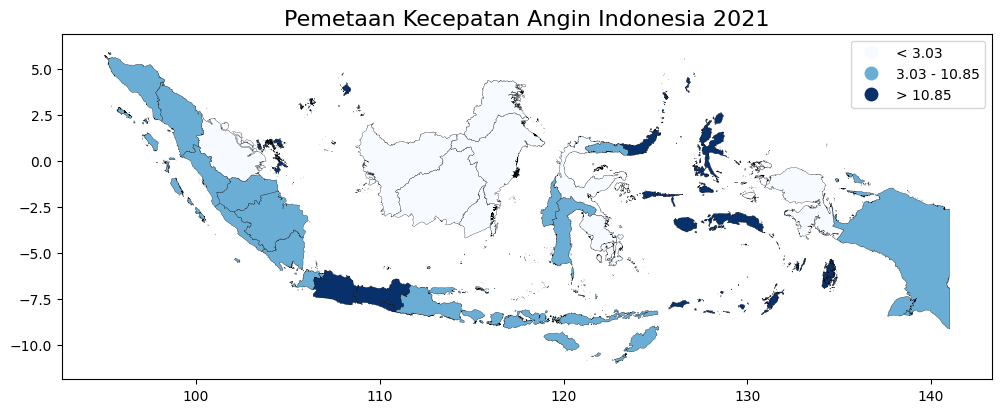

In [20]:
create_choropleth(data_iklim, 'WS10M', colors, 'Pemetaan Kecepatan Angin Indonesia 2021')

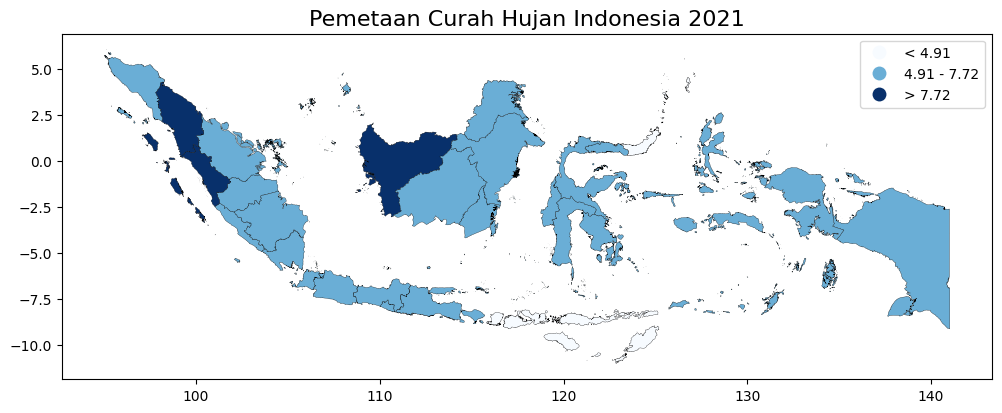

In [22]:
create_choropleth(data_iklim, 'PRECTOTCORR', colors, 'Pemetaan Curah Hujan Indonesia 2021')